<a href="https://colab.research.google.com/github/plaban1981/TMLC/blob/main/DMSP_Particle_Precipitate_Flux_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [2]:
path_dir = "/content/drive/MyDrive/TMLC/DMSP Particle Precipitate Flux Prediction"
file_name = "AI_Ready_DMSP_Data.csv"
file_path = os.path.join(path_dir,file_name)
print(file_path)

/content/drive/MyDrive/TMLC/DMSP Particle Precipitate Flux Prediction/AI_Ready_DMSP_Data.csv


In [3]:
df = pd.read_csv(file_path)
df.head()

,Datetimes,SC_AACGM_LAT,SC_AACGM_LTIME,ELE_TOTAL_ENERGY_FLUX,ELE_TOTAL_ENERGY_FLUX_STD,ELE_AVG_ENERGY,ELE_AVG_ENERGY_STD,ID_SC,sin_ut,cos_ut,...,AE_5min,AL_5min,AU_5min,SymH_5min,PC_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min
0,1987-01-12 12:57:00,51.143220,5.664024,2.057827e+08,0.411230,39.89341,0.411485,6.0,-0.246153,-0.969231,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
1,1987-01-12 12:58:00,54.137207,5.535848,2.509837e+08,0.478268,40.82392,0.478568,6.0,-0.250380,-0.968148,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
2,1987-01-12 13:01:00,62.928176,5.031172,4.469146e+08,0.603362,143.77360,0.604023,6.0,-0.263031,-0.964787,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
3,1987-01-12 13:02:00,65.719631,4.794780,1.934849e+10,0.103648,820.36560,0.103671,6.0,-0.267238,-0.963630,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
4,1987-01-12 13:03:00,68.392364,4.507448,3.913337e+11,0.114959,5291.57100,0.114959,6.0,-0.271440,-0.962455,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015


## Summary Statistics

In [4]:
df.shape

(1945887, 154)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945887 entries, 0 to 1945886
Columns: 154 entries, Datetimes to newell_5min
dtypes: float64(153), object(1)
memory usage: 2.2+ GB


In [6]:
df['Datetimes'].dtypes

dtype('O')

## Check Null Values

In [7]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [8]:
df['Datetimes'] = pd.to_datetime(df['Datetimes'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945887 entries, 0 to 1945886
Columns: 154 entries, Datetimes to newell_5min
dtypes: datetime64[ns](1), float64(153)
memory usage: 2.2 GB


In [10]:
df.head()

,Datetimes,SC_AACGM_LAT,SC_AACGM_LTIME,ELE_TOTAL_ENERGY_FLUX,ELE_TOTAL_ENERGY_FLUX_STD,ELE_AVG_ENERGY,ELE_AVG_ENERGY_STD,ID_SC,sin_ut,cos_ut,...,AE_5min,AL_5min,AU_5min,SymH_5min,PC_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min
0,1987-01-12 12:57:00,51.143220,5.664024,2.057827e+08,0.411230,39.89341,0.411485,6.0,-0.246153,-0.969231,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
1,1987-01-12 12:58:00,54.137207,5.535848,2.509837e+08,0.478268,40.82392,0.478568,6.0,-0.250380,-0.968148,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
2,1987-01-12 13:01:00,62.928176,5.031172,4.469146e+08,0.603362,143.77360,0.604023,6.0,-0.263031,-0.964787,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
3,1987-01-12 13:02:00,65.719631,4.794780,1.934849e+10,0.103648,820.36560,0.103671,6.0,-0.267238,-0.963630,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
4,1987-01-12 13:03:00,68.392364,4.507448,3.913337e+11,0.114959,5291.57100,0.114959,6.0,-0.271440,-0.962455,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015


##Target - ELE_TOTAL_ENERGY_FLUX

In [14]:
df['ELE_TOTAL_ENERGY_FLUX'].describe()

count    1.945887e+06
mean     3.482163e+11
std      9.502920e+13
min      2.632692e+06
25%      1.695103e+08
50%      5.541485e+08
75%      1.304165e+10
max      5.648257e+16
Name: ELE_TOTAL_ENERGY_FLUX, dtype: float64

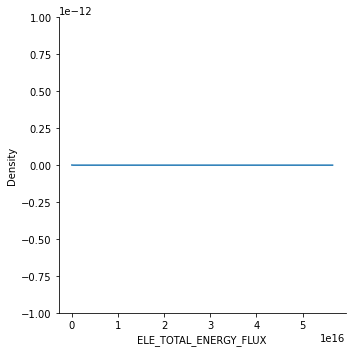

In [12]:
sns.displot(data=df,x='ELE_TOTAL_ENERGY_FLUX',kind="kde")

In [17]:
df['Datetimes'].dt.day

0          12
1          12
2          12
3          12
4          12
           ..
1945882    31
1945883    31
1945884    31
1945885    31
1945886    31
Name: Datetimes, Length: 1945887, dtype: int64

In [18]:
df['Year'] = df['Datetimes'].dt.year
df['Month'] = df['Datetimes'].dt.month
df['Day'] = df['Datetimes'].dt.day

In [19]:
df.head()

,Datetimes,SC_AACGM_LAT,SC_AACGM_LTIME,ELE_TOTAL_ENERGY_FLUX,ELE_TOTAL_ENERGY_FLUX_STD,ELE_AVG_ENERGY,ELE_AVG_ENERGY_STD,ID_SC,sin_ut,cos_ut,...,SymH_5min,PC_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min,Year,Month,Day
0,1987-01-12 12:57:00,51.143220,5.664024,2.057827e+08,0.411230,39.89341,0.411485,6.0,-0.246153,-0.969231,...,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963,1987,1,12
1,1987-01-12 12:58:00,54.137207,5.535848,2.509837e+08,0.478268,40.82392,0.478568,6.0,-0.250380,-0.968148,...,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963,1987,1,12
2,1987-01-12 13:01:00,62.928176,5.031172,4.469146e+08,0.603362,143.77360,0.604023,6.0,-0.263031,-0.964787,...,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015,1987,1,12
3,1987-01-12 13:02:00,65.719631,4.794780,1.934849e+10,0.103648,820.36560,0.103671,6.0,-0.267238,-0.963630,...,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015,1987,1,12
4,1987-01-12 13:03:00,68.392364,4.507448,3.913337e+11,0.114959,5291.57100,0.114959,6.0,-0.271440,-0.962455,...,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015,1987,1,12


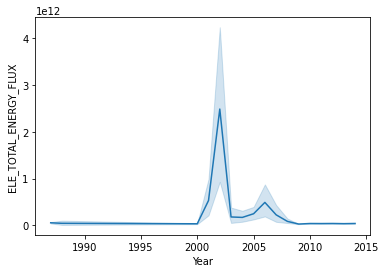

In [22]:
sns.lineplot(x='Year',y='ELE_TOTAL_ENERGY_FLUX',data=df)

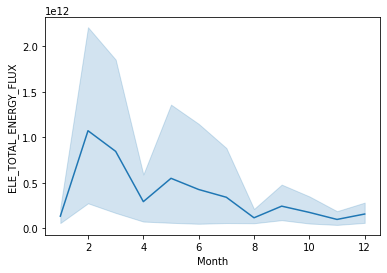

In [23]:
sns.lineplot(x='Month',y='ELE_TOTAL_ENERGY_FLUX',data=df)

In [24]:
new_df = df.drop('Datetimes',axis=1)

In [25]:
new_df.shape

(1945887, 156)

https://github.com/rmcgranaghan/precipNet/blob/master/Final__Data_Read_And_Prepare.ipynb

In [26]:
# Choose columns to drop
cols_to_drop = [c for c in new_df.columns if ('1min' in c) | ('3min' in c) | ('4min' in c) | ('_5min'in c) | ('15min' in c)| ('5hr' in c) | ('F107_' in c) | ('vx' in c) | ('AE' in c) | ('newell' in c) | ('borovsky' in c) | ('STD' in c) | ('AVG' in c) | ('SC_AACGM_LTIME'==c)]
new_df = new_df.drop(columns=cols_to_drop)

In [27]:
new_df.shape

(1945887, 76)

In [30]:
print('number of input features total = {}'.format(new_df.shape[1]))

number of input features total = 76


In [29]:
# Define the threshold above which to remove energy flux values
eflux_threshold_quantile = 99.995
eflux_threshold = .99995

# Define the conversion factor from eV to erg
erg_eV_factor = (1.60218e-12)

## Remove Outliers